# Introduction
> This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. Dataset which contain some customers who are withdrawing their account from the bank due to some loss and other issues with the help this data we try to analyse and maintain accuracy.


>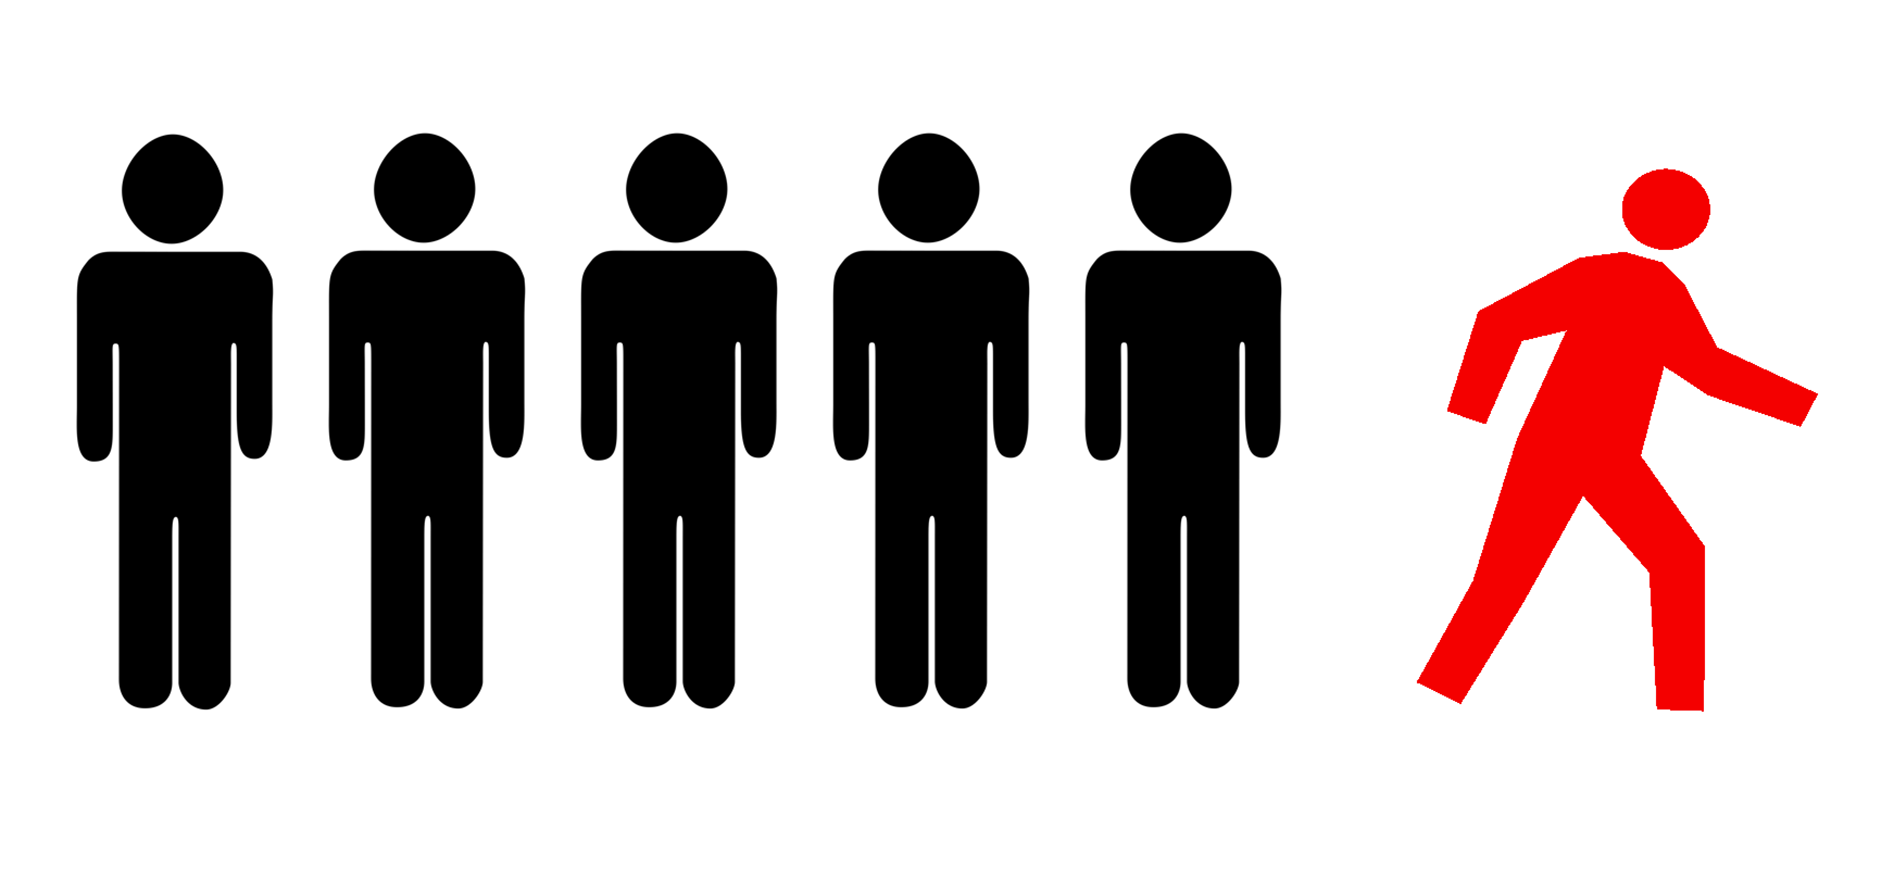



>## **Dataset Content**
We've Dataset with  10000 rows and 14 columns that're :
1. RowNumber—corresponds to the record (row) number and has no effect on the output.
2. CustomerId—contains random values and has no effect on customer leaving the bank.
3. Surname—the surname of a customer has no impact on their decision to leave the bank.
4. CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. Geography—a customer’s location can affect their decision to leave the bank.
6. Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
7. Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. NumOfProducts—refers to the number of products that a customer has purchased through the bank.
11. HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. IsActiveMember—active customers are less likely to leave the bank.
13. EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. Exited—whether or not the customer left the bank.

> For more information about dataset and problem : https://www.kaggle.com/shrutimechlearn/churn-modelling


#Importing Libraries and Dataset



In [1]:
!pip3 install pandas_profiling --upgrade    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(8, 8)}, font_scale=1.3)

In [4]:
df = pd.read_csv('churn.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.shape

(10000, 14)

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8188,8189,15623314,Tucker,506,Germany,Female,59,3,190353.08,1,1,0,78365.75,0
5802,5803,15716236,Milani,499,France,Male,35,10,0.00,2,1,0,10722.54,0
4317,4318,15592194,Metcalf,492,France,Female,28,9,0.00,2,1,0,95957.09,0
9330,9331,15780256,Palfreyman,630,France,Male,34,9,0.00,2,1,1,114006.35,0
7033,7034,15813718,Kirillova,651,Spain,Male,45,4,0.00,2,0,0,193009.21,0


In [11]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
df.drop(['RowNumber','CustomerId'],axis=1,inplace = True)

In [13]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Preprocessing |

## Data Cleaning

### Checking Columns Datatype

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [15]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Checking Missing Values

In [16]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
#Return percentage of missing values in each column  
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}  -  {}%'.format(col, round(pct_missing*100)))

Surname  -  0%
CreditScore  -  0%
Geography  -  0%
Gender  -  0%
Age  -  0%
Tenure  -  0%
Balance  -  0%
NumOfProducts  -  0%
HasCrCard  -  0%
IsActiveMember  -  0%
EstimatedSalary  -  0%
Exited  -  0%


### Checking Duplicates
 

In [18]:
df.duplicated().sum()

0

In [19]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Feature Engineering

In [20]:
 # According to  FICO® Credit Scores 
def extract_credit_score(credit_score):
    if credit_score in range(300,580) :
        return 'Poor'
    elif credit_score in range(580,670) :
        return 'Fair'
    elif credit_score in range(670,740) :
        return 'Good'
    elif credit_score in range(740,800) :
        return 'Very Good'
    else :
       return 'Exceptional'


In [21]:
df['Credit_Score_Type'] = df['CreditScore'].apply(extract_credit_score)

In [22]:
df['Credit_Score_Type'].value_counts()

Fair           3331
Good           2428
Poor           2362
Very Good      1224
Exceptional     655
Name: Credit_Score_Type, dtype: int64

In [23]:
df['HasCrCard'].unique()

array([1, 0])

In [24]:
df['Exited'].unique()

array([1, 0])

In [25]:
df['IsActiveMember'].unique()

array([1, 0])

In [26]:
dict_mapping_yes_no = {
     0 : 'No',
     1 : 'Yes'}
df['HasCrCard'] = df['HasCrCard'].map(dict_mapping_yes_no)

In [27]:
df['IsActiveMember'] = df['IsActiveMember'].map(dict_mapping_yes_no)

In [28]:
df['Exited'] = df['Exited'].map(dict_mapping_yes_no)

In [29]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Score_Type
0,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Fair
1,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Fair
2,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Poor
3,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,Good
4,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,Exceptional
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No,Very Good
9996,Johnstone,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No,Poor
9997,Liu,709,France,Female,36,7,0.00,1,No,Yes,42085.58,Yes,Good
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,Yes,Very Good


# Analysis and Visualization

## Churn Count in Bank

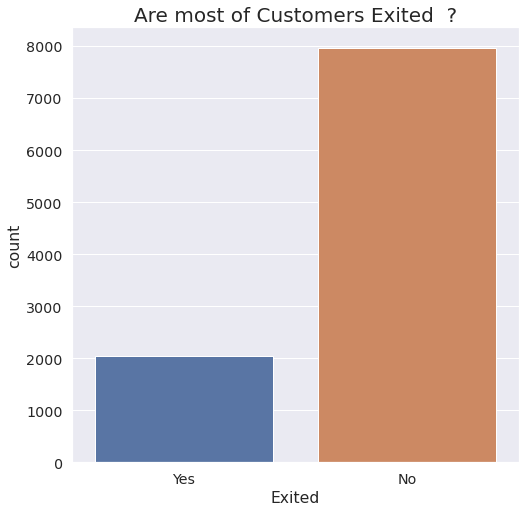

In [30]:
sns.countplot(x=df['Exited'])
plt.title('Are most of Customers Exited  ?',size = 20)
plt.show()

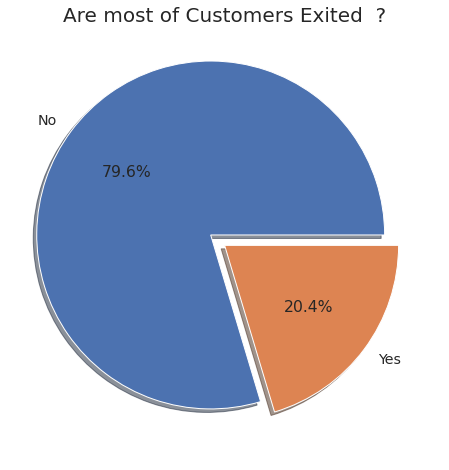

In [31]:
plt.pie(df['Exited'].value_counts(),labels =df['Exited'].value_counts().index,
        autopct='%1.1f%%',shadow = True, explode = [0.1,0])
plt.title('Are most of Customers Exited  ?',size = 20)
plt.show()

## Number Products Purchased through Bank
> 
   1. Distribution to Number of Products purchased through Bank
   2. Relation between Number of Products purchased through Bank and Age
   2. Relation between Number of Products and whether or not the customer left the bank.

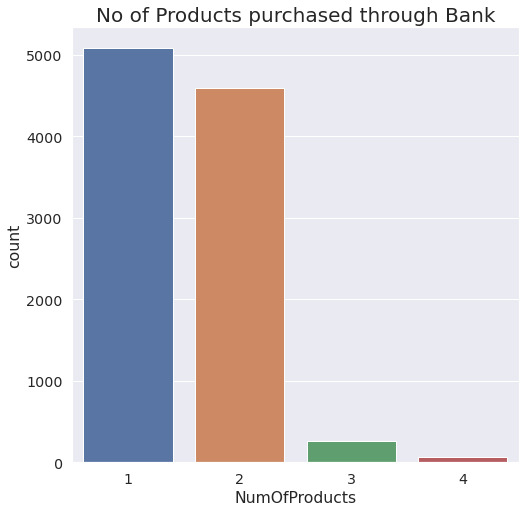

In [32]:
sns.countplot(x = df['NumOfProducts'])
plt.title('No of Products purchased through Bank',size = 20)
plt.show()

Relation between Number of Products purchased through Bank and Age

In [33]:
df.groupby('NumOfProducts').mean()['Age']

NumOfProducts
1    39.673092
2    37.753595
3    43.195489
4    45.683333
Name: Age, dtype: float64

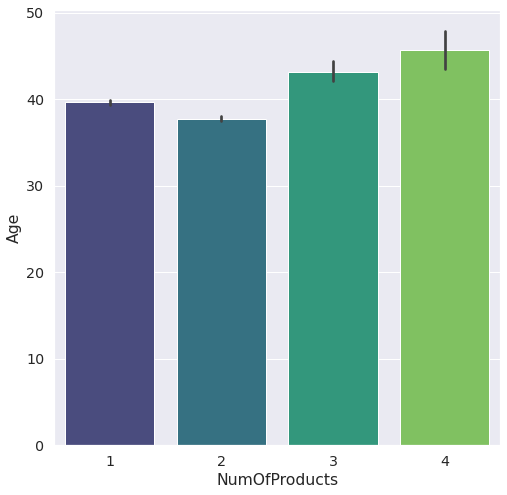

In [34]:
sns.barplot(x = df['NumOfProducts'],y=df['Age'],
            estimator=np.mean,palette='viridis')

Sum of Number of Products purchased through Bank whether or not the customer left the bank.


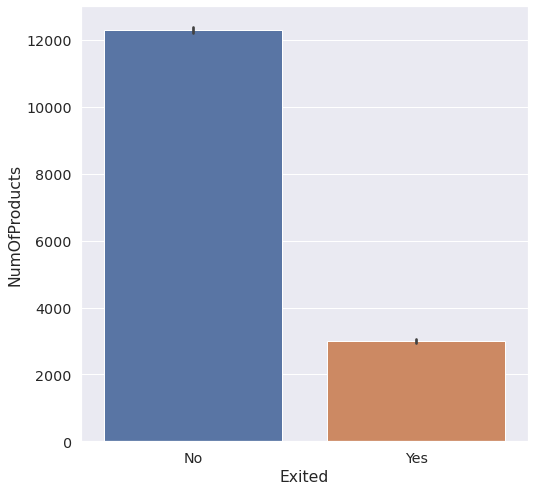

In [35]:
sns.barplot(y = df['NumOfProducts'],x=df['Exited'],estimator=np.sum,
            order= df['Exited'].value_counts().index)

##  Customers Activtity 
>   
  1. Count of Customers Activtity 
  2. Average of Age of Active Members and not Active Members
  3.  Average of  number of years that the customer has been a client of the bank vs Active Members and not Active Members

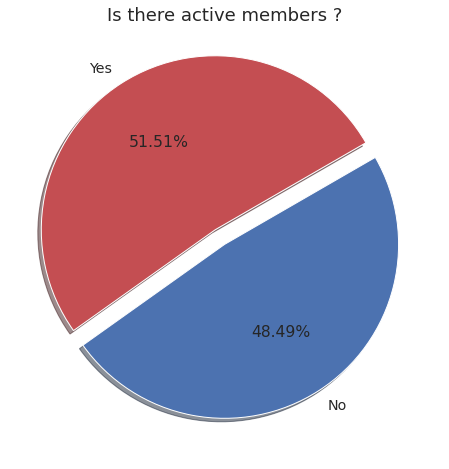

In [36]:
plt.pie(df['IsActiveMember'].value_counts(),labels =df['IsActiveMember'].value_counts().index,
        autopct='%1.2f%%',shadow = True, explode = [0.1,0],startangle=30,colors= ['r','b'])
plt.title('Is there active members ?',size = 18)
plt.show()

Average of Age of Active Members and not Active Members

In [37]:
df.groupby('IsActiveMember').mean()['Age']

IsActiveMember
No     37.997938
Yes    39.791497
Name: Age, dtype: float64

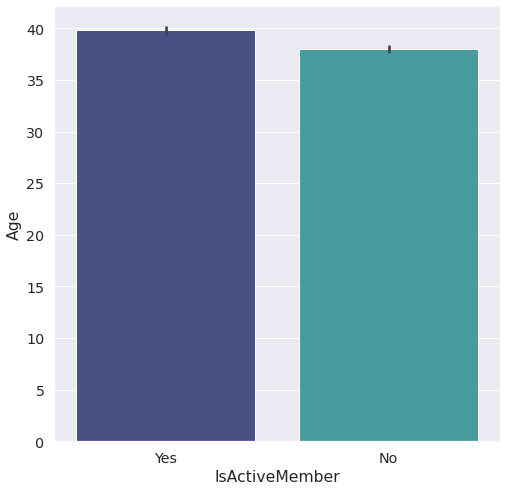

In [38]:
sns.barplot(x = df['IsActiveMember'],y=df['Age'],
            estimator=np.mean,palette='mako')

Average of number of years that the customer has been a client of the bank vs Active Members and not Active Members

In [39]:
df.groupby('IsActiveMember').mean()['Tenure']

IsActiveMember
No     5.097340
Yes    4.933217
Name: Tenure, dtype: float64

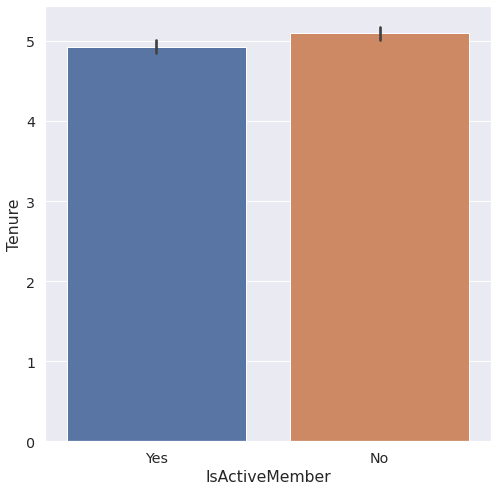

In [40]:
sns.barplot(x = df['IsActiveMember'],y=df['Tenure'],
            estimator=np.mean)

## Customers Estimated Salary 

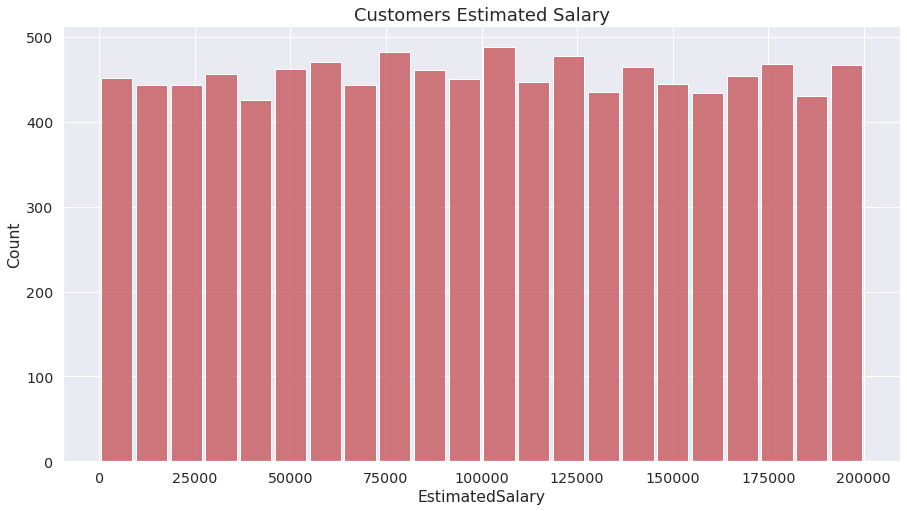

In [41]:
sns.set(rc={'figure.figsize':(15, 8)}, font_scale=1.3)
sns.histplot(data=df,x="EstimatedSalary",
             color="r",shrink=.9)
plt.title('Customers Estimated Salary',size = 18)
plt.show()

## Credit Card Score vs Leaving Bank

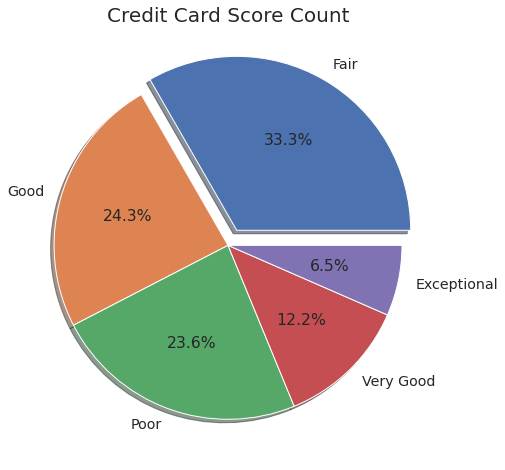

In [42]:
sns.set(rc={'figure.figsize':(12, 8)}, font_scale=1.3)
plt.pie(df['Credit_Score_Type'].value_counts(),labels =df['Credit_Score_Type'].value_counts().index,
        autopct='%1.1f%%',shadow = True, explode = [0.1,0,0,0,0])
plt.title('Credit Card Score Count',size = 20)
plt.show()

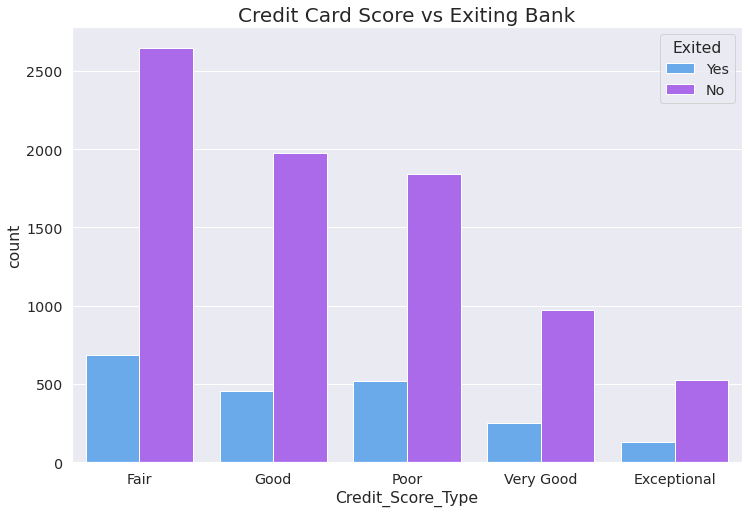

In [43]:
sns.countplot(x=df['Credit_Score_Type'],
              order= df['Credit_Score_Type'].value_counts().index,
              hue = df['Exited'],palette='cool')
plt.title('Credit Card Score vs Exiting Bank',size = 20)
plt.show()

## Gender vs Leaving Bank

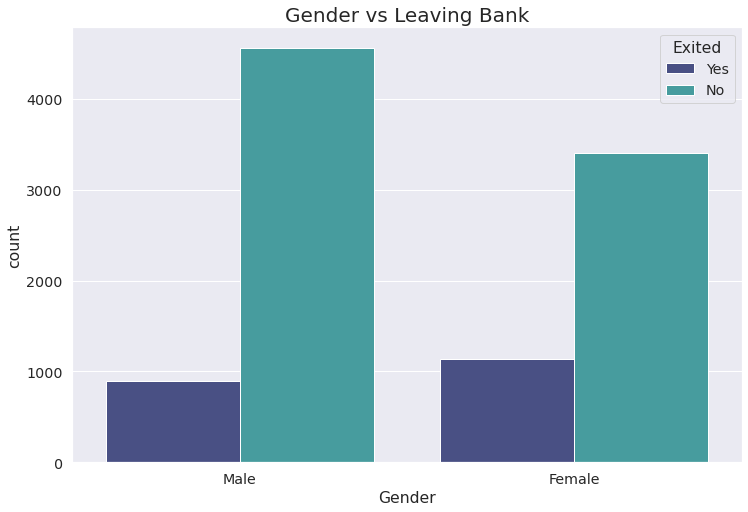

In [44]:
sns.countplot(x=df['Gender'],
              order= df['Gender'].value_counts().index,
              hue = df['Exited'],palette='mako')
plt.title('Gender vs Leaving Bank',size = 20)
plt.show()

## Does Bank Balance affects on Lefting Bank ? 


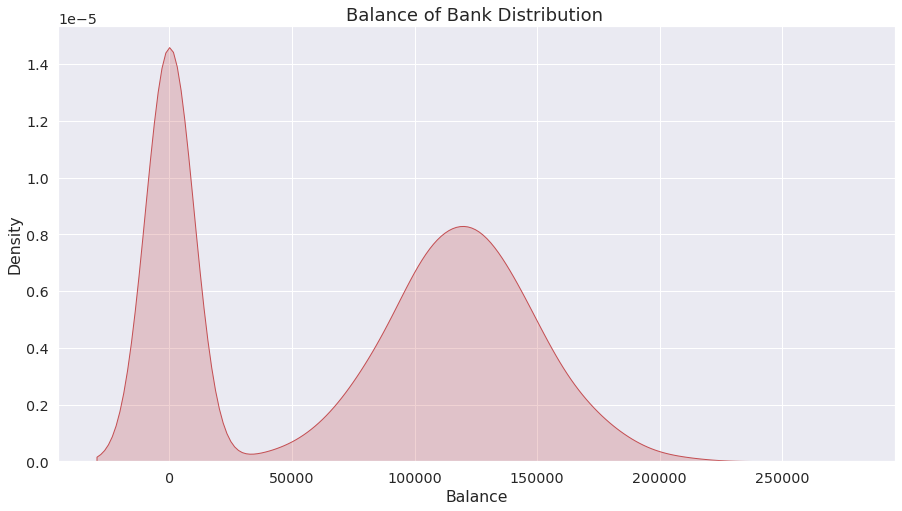

In [45]:
sns.set(rc={'figure.figsize':(15, 8)}, font_scale=1.3)
sns.kdeplot(data=df,x="Balance",
             color="r",shade =True)
plt.title('Balance of Bank Distribution ',size = 18)
plt.show()

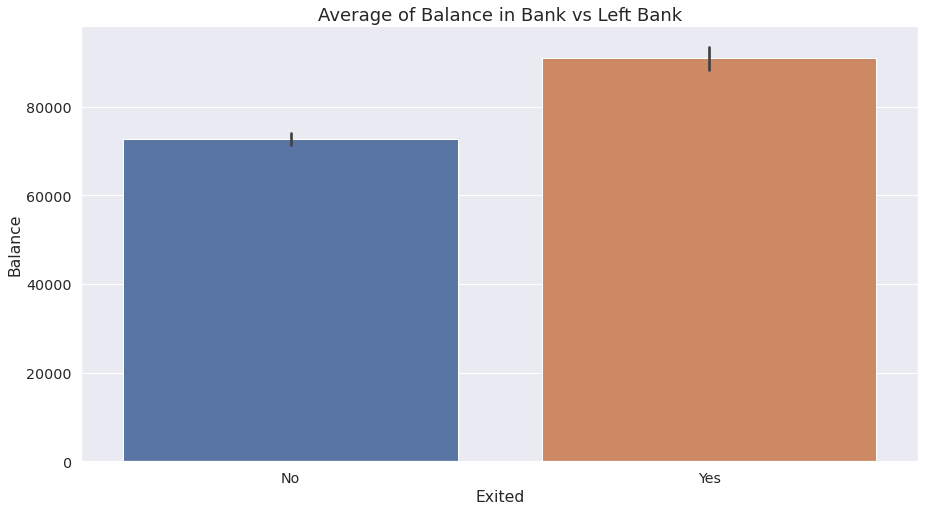

In [46]:
sns.barplot(x=df['Exited'],y = df['Balance'],estimator=np.mean,
            order= df['Exited'].value_counts().index)
plt.title('Average of Balance in Bank vs Left Bank',size = 18)
plt.show()

## Does the years spent by the customer with the bank affect leaving the bank? 

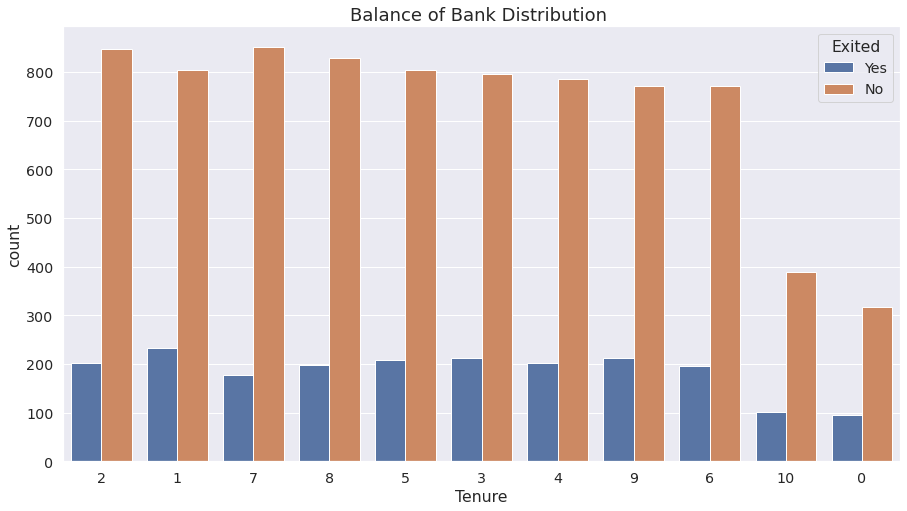

In [47]:
sns.countplot(data=df,x="Tenure",order=df['Tenure'].value_counts().index
              , hue = df['Exited'])
plt.title('Balance of Bank Distribution ',size = 18)
plt.show()

Average of years spent by the customer with the bank vs Leaving  Bank

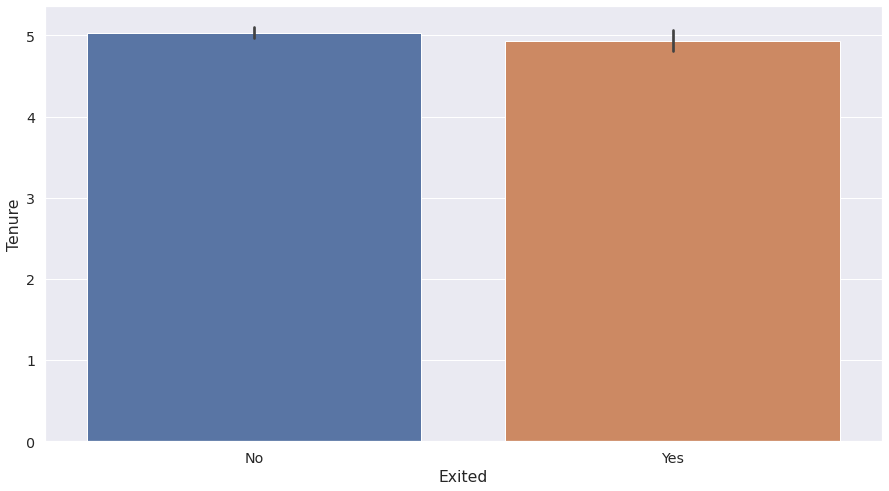

In [48]:
sns.barplot(x=df['Exited'],y = df['Tenure'],estimator=np.mean,
            order= df['Exited'].value_counts().index)


In [49]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Score_Type
0,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Fair
1,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Fair
2,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Poor
3,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,Good
4,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,Exceptional
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No,Very Good
9996,Johnstone,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No,Poor
9997,Liu,709,France,Female,36,7,0.00,1,No,Yes,42085.58,Yes,Good
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,Yes,Very Good


## What is Relation between having credit card and Leaving Bank ?

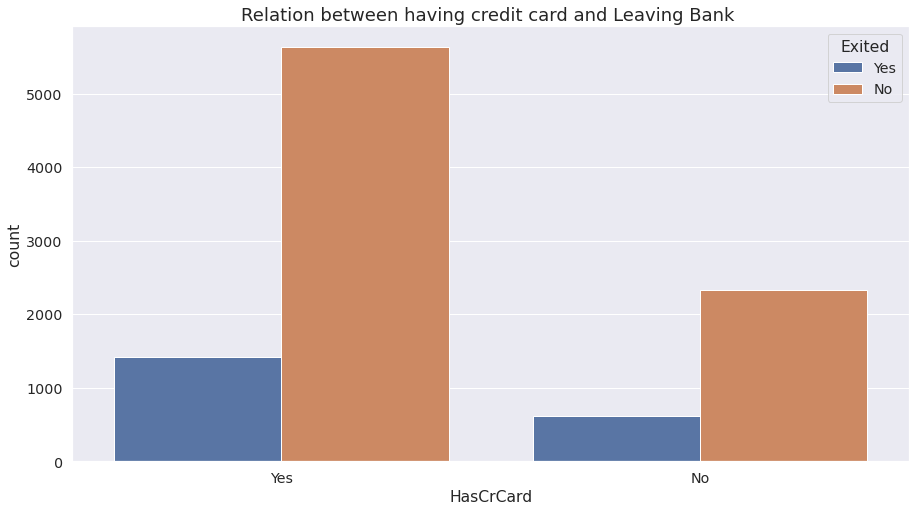

In [50]:
sns.countplot(data=df,x="HasCrCard",order=df['HasCrCard'].value_counts().index
              , hue = df['Exited'])
plt.title('Relation between having credit card and Leaving Bank ',size = 18)
plt.show()

## Final Quick Overview

In [51]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


## Data Preprocessing ||

In [53]:
dict_mapping_yes_no = {
     'No' : 0 ,
    'Yes' : 1}
df['HasCrCard'] = df['HasCrCard'].map(dict_mapping_yes_no)

In [54]:
df['IsActiveMember'] = df['IsActiveMember'].map(dict_mapping_yes_no)

In [55]:
df['Exited'] = df['Exited'].map(dict_mapping_yes_no)

In [56]:
df.drop('Surname',axis=1 ,inplace = True)

In [57]:
df.drop('CreditScore',axis=1 ,inplace = True)
df

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Score_Type
0,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exceptional
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,2,1,0,96270.64,0,Very Good
9996,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor
9997,France,Female,36,7,0.00,1,0,1,42085.58,1,Good
9998,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Very Good


### Handling Categorical Data

In [58]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [59]:
from sklearn.preprocessing import LabelEncoder
df['Credit_Score_Type'] = LabelEncoder().fit_transform(df['Credit_Score_Type'])

In [60]:
df

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Score_Type,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,1,0,1,0
2,42,8,159660.80,3,1,0,113931.57,1,3,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,2,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0,4,0,0,1
9996,35,10,57369.61,1,1,1,101699.77,0,3,0,0,1
9997,36,7,0.00,1,0,1,42085.58,1,2,0,0,0
9998,42,3,75075.31,2,1,0,92888.52,1,4,1,0,1


### Imbalanced Classes Handling

In [61]:
x = df.drop(['Exited'],axis=1)

In [62]:
x

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Credit_Score_Type,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,41,1,83807.86,1,0,1,112542.58,1,0,1,0
2,42,8,159660.80,3,1,0,113931.57,3,0,0,0
3,39,1,0.00,2,0,0,93826.63,2,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,4,0,0,1
9996,35,10,57369.61,1,1,1,101699.77,3,0,0,1
9997,36,7,0.00,1,0,1,42085.58,2,0,0,0
9998,42,3,75075.31,2,1,0,92888.52,4,1,0,1


In [63]:
y = df['Exited']

In [64]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [65]:
y.value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [66]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x , y = sampler.fit_resample(x,y)

In [67]:
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

### Spliting

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=40,shuffle=True,stratify = y)

In [70]:
x_train

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Credit_Score_Type,Geography_Germany,Geography_Spain,Gender_Male
13112,53,3,132348.528728,1,0,0,5578.924272,1,1,0,1
12217,37,5,107218.215305,1,0,0,80044.726289,1,1,0,0
11980,44,3,110580.292235,1,1,0,26340.211953,3,0,0,0
3775,22,5,93547.230000,2,0,1,961.570000,3,1,0,1
10145,40,3,115754.195507,2,0,0,126473.687151,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
15565,35,1,83999.767068,1,1,0,72743.765350,1,0,0,0
223,33,10,0.000000,1,1,0,4861.720000,0,0,0,1
14396,54,8,122345.660907,1,1,0,175304.875018,4,0,0,0
2658,40,2,164948.980000,3,0,0,177028.000000,2,1,0,1


In [71]:
x_train.shape

(12740, 11)

In [72]:
x_test

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Credit_Score_Type,Geography_Germany,Geography_Spain,Gender_Male
5308,31,1,113693.000000,1,0,0,82796.290000,3,0,1,0
5798,54,0,134249.700000,1,0,1,13404.400000,2,0,1,1
3829,36,1,70784.270000,1,1,0,30579.820000,1,0,0,0
3965,23,8,85600.080000,1,0,0,134077.710000,4,0,1,0
1117,47,1,115414.190000,3,0,0,191734.670000,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14158,50,2,116617.912534,1,1,0,4225.654594,1,0,0,0
4824,35,5,136364.460000,1,0,0,142754.710000,2,0,0,1
10141,40,1,102389.596488,1,0,0,179786.266997,1,0,0,0
5123,29,8,93833.860000,1,0,1,10417.870000,0,0,1,1


In [73]:
x_test.shape

(3186, 11)

In [74]:
y_train

13112    1
12217    1
11980    1
3775     0
10145    1
        ..
15565    1
223      1
14396    1
2658     1
2239     1
Name: Exited, Length: 12740, dtype: int64

In [75]:
y_train.shape

(12740,)

In [76]:
y_test

5308     0
5798     0
3829     0
3965     0
1117     1
        ..
14158    1
4824     0
10141    1
5123     0
1483     0
Name: Exited, Length: 3186, dtype: int64

In [77]:
y_test.shape

(3186,)

In [78]:
y_test.value_counts()

0    1593
1    1593
Name: Exited, dtype: int64

###2. Scalling 

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scalar = StandardScaler()

In [81]:
scalar.fit(x_train)
x_train = scalar.transform(x_train)

In [82]:
x_test=scalar.transform(x_test)

In [83]:
x_train

array([[ 1.20183394, -0.66404487,  0.81843216, ...,  1.74152858,
        -0.46388042,  1.18710928],
       [-0.39547085,  0.07057927,  0.41044245, ...,  1.74152858,
        -0.46388042, -0.84238243],
       [ 0.30334999, -0.66404487,  0.46502564, ..., -0.5742082 ,
        -0.46388042, -0.84238243],
       ...,
       [ 1.30166548,  1.17251549,  0.65603597, ..., -0.5742082 ,
        -0.46388042, -0.84238243],
       [-0.0959762 , -1.03135695,  1.34769928, ...,  1.74152858,
        -0.46388042,  1.18710928],
       [-0.99446014, -0.66404487, -1.33024132, ..., -0.5742082 ,
        -0.46388042, -0.84238243]])

In [84]:
x_test

array([[-0.99446014, -1.39866902,  0.51556034, ..., -0.5742082 ,
         2.15572798, -0.84238243],
       [ 1.30166548, -1.76598109,  0.8492976 , ..., -0.5742082 ,
         2.15572798,  1.18710928],
       [-0.4953024 , -1.39866902, -0.18106131, ..., -0.5742082 ,
        -0.46388042, -0.84238243],
       ...,
       [-0.0959762 , -1.39866902,  0.33205   , ..., -0.5742082 ,
        -0.46388042, -0.84238243],
       [-1.19412324,  1.17251549,  0.19314793, ..., -0.5742082 ,
         2.15572798,  1.18710928],
       [-0.4953024 , -1.39866902,  0.35944802, ..., -0.5742082 ,
        -0.46388042,  1.18710928]])

In [85]:
y_test.value_counts()

0    1593
1    1593
Name: Exited, dtype: int64

# Modelling and Evalution

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,fbeta_score

In [87]:
models = {
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(n_estimators=200,max_depth=7),
    "DT": DecisionTreeClassifier(),
    "GradientBoosting"  :  GradientBoostingClassifier(n_estimators=250,max_depth=9,),
    "XGB": XGBClassifier(n_estimators=200 ,max_depth=9 ),
    "KNN" : KNeighborsClassifier()
}

In [88]:
for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*70)

Training Model LR 
-----------------------------------------------
Training Accuracy: 0.7819466248037676
Testing Accuracy: 0.7790332705586943
Testing Confusion Matrix: 
[[1241  352]
 [ 352 1241]]
Testing Recall: 0.7790332705586943
Testing Precesion: 0.7790332705586943
Testing F-1: 0.7790332705586943
Testing F-Beta: 0.7790332705586943
----------------------------------------------------------------------
Training Model RF 
-----------------------------------------------
Training Accuracy: 0.8365777080062794
Testing Accuracy: 0.8210922787193974
Testing Confusion Matrix: 
[[1339  254]
 [ 316 1277]]
Testing Recall: 0.8016321406151915
Testing Precesion: 0.8340953625081646
Testing F-1: 0.8175416133162613
Testing F-Beta: 0.8273940650511856
----------------------------------------------------------------------
Training Model DT 
-----------------------------------------------
Training Accuracy: 1.0
Testing Accuracy: 0.7897049591964846
Testing Confusion Matrix: 
[[1230  363]
 [ 307 1286]]
Testi

In [99]:
model = GradientBoostingClassifier(n_estimators=250,max_depth=9)
model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=9, n_estimators=250)

In [100]:
y_pred = model.predict(x_test)

In [101]:
print('Frist 10 Real Outputs in Testing : \n ', y_test[:10].values)
print('--'*50)
print('Frist 10 Predicated Outputs in Testing : \n ', y_pred[:10])

Frist 10 Real Outputs in Testing : 
  [0 0 0 0 1 0 0 0 1 0]
----------------------------------------------------------------------------------------------------
Frist 10 Predicated Outputs in Testing : 
  [0 0 1 0 1 0 0 0 1 0]


In [102]:
y_compare={'y_test':y_test, 'y_predicted':y_pred}
pd.DataFrame(y_compare)

,y_test,y_predicted
5308,0,0
5798,0,0
3829,0,1
3965,0,0
1117,1,1
...,...,...
14158,1,1
4824,0,0
10141,1,1
5123,0,0


In [103]:
print('Training Score is : ' , model.score(x_train, y_train))
print( '--'*50)
print('Testing Score is : ' , model.score(x_test, y_test))

Training Score is :  1.0
----------------------------------------------------------------------------------------------------
Testing Score is :  0.8656622724419335


In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [105]:
print('confusion Matrix :')  
print('--'*30)
print(confusion_matrix(y_test,y_pred))

confusion Matrix :
------------------------------------------------------------
[[1384  209]
 [ 219 1374]]


In [106]:
df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual Labels'
df_cm.columns.name = 'Predicted Labels'
df_cm

Predicted Labels,0,1
Actual Labels,,
0,1384,209
1,219,1374


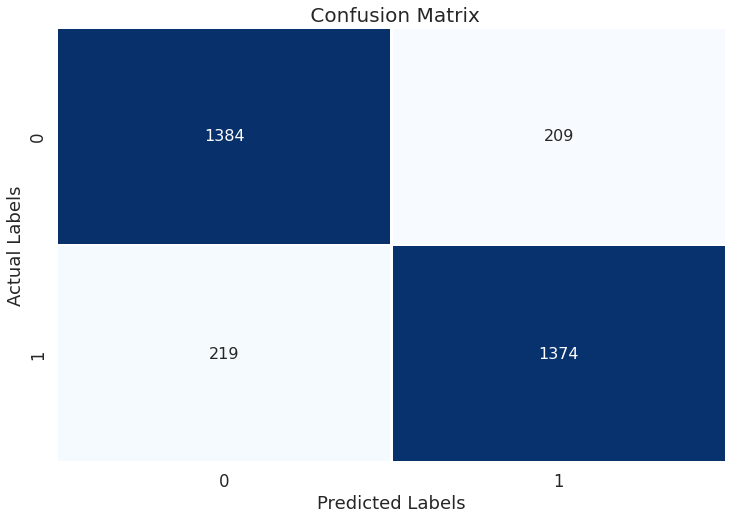

In [107]:
sns.set(rc={'figure.figsize':(12, 8)}, font_scale=1.5)
plt.title(" Confusion Matrix", size=20)
sns.heatmap( df_cm,cmap='Blues', annot=True,annot_kws={"size": 16},fmt='',
            linewidths=1.3,cbar=False , linecolor = 'w')

In [108]:
matrix = classification_report(y_test,y_pred)
print('Classification report :')
print('--'*30)
print(matrix)


Classification report :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1593
           1       0.87      0.86      0.87      1593

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

